# Linear Regression Project 
Steps i will follow in this project :
1.Load the dataset into a Pandas DataFrame.
2.Explore and preprocess the data.
3.Split the data into training and testing sets.
4.Train a linear regression model.
5.Evaluate the model's performance.
6.Make predictions.

 *In below cell I will import all libraries that we will use 

In [47]:
%matplotlib inline
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib tk
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
#1.Reading the dataset
data = pd.read_excel("Apartments_Data.xlsx")
data.head()

gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0       110.0  1998.0      1          1         2          1        1   
1       160.0  2000.0      1          2         3          0        0   
2       126.5  2021.0      2          1         2          1        1   
3       130.5  2021.0      2          2         2          0        1   
4       131.7  2021.0      2          2         2          0        1   

   mortgage           status  \
0         1  pallat I vjeter   
1         0  pallat I vjeter   
2         1      pallat I ri   
3         1   I PaPerfunduar   
4         1   I PaPerfunduar   

                                             address  ... air_conditioner  \
0  Sheshi Willson - Rruga "Zef Jubani" - Tirana e...  ...               0   
1  Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...  ...               0   
2          Liqeni i Thate - Liqeni i Thatë, Shqipëri  ...               1   
3    Rruga e Dafinave - Fusha e Aviacionit, Shqipëri  ...               0   
4    Rruga e Dafinave - Fusha e Aviacionit, Shqipëri  ...               0   

   chimney  natural_light termoizolation  capot_system  acoustic  façade  \
0        0              0              0             0         0       0   
1        0              0              0             0         0       0   
2        0              1              0             0         0       0   
3        0              0              0             0         0       1   
4        0              0              0             0         0       1   

   solar_panel    Area      price  
0            0  Urbane  170000.0$  
1            0  Urbane  224000.0$  
2            0  Urbane  195000.0$  
3            0  Urbane  156000.0$  
4            0  Urbane  159000.0$  

[5 rows x 27 columns]

In [3]:
#2. Exploring dataset

# Display information about the DataFrame, including column names, data types, and non-null counts
print(data.info())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gross_area           3840 non-null   float64
 1   year                 3837 non-null   float64
 2   floor                3840 non-null   int64  
 3   bathrooms            3840 non-null   int64  
 4   bedrooms             3840 non-null   int64  
 5   furnished            3840 non-null   int64  
 6   balcony              3840 non-null   int64  
 7   mortgage             3840 non-null   int64  
 8   status               3840 non-null   object 
 9   address              3840 non-null   object 
 10  comments             3840 non-null   object 
 11  lat                  3840 non-null   float64
 12  lon                  3840 non-null   float64
 13  orientation          3840 non-null   object 
 14  storehouse           3840 non-null   int64  
 15  parquet              3840 non-null   i

In [4]:
import ydata_profiling as pp
from ydata_profiling import ProfileReport

In [5]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# # Handle missing values
# data['year'].fillna(data['year'].median(), inplace=True)

# # Convert categorical variables
# data['status'] = data['status'].astype('category').cat.codes
# data['orientation'] = data['orientation'].astype('category').cat.codes
# data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
# data['price'] = pd.to_numeric(data['price'], errors='coerce')

# # Split the data into features (X) and target (y)
# X = data.drop(['price', 'address', 'comments'], axis=1)  # Drop irrelevant columns
# y = data['price']

In [7]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

gross_area         year        floor    bathrooms     bedrooms  \
count   3837.000000  3837.000000  3837.000000  3837.000000  3837.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     103.811454  2001.938233     4.298150     1.440448     1.891843   
std       39.511313    37.108121     2.508324     0.529535     0.713368   
min       35.600000   697.000000     1.000000     1.000000     1.000000   
25%       75.000000  1985.000000     2.000000     1.000000     1.000000   
50%      100.000000  2007.000000     4.000000     1.000000     2.000000   
75%      120.000000  2018.000000     6.000000     2.000000     2.000000   
max      422.000000  2025.000000    20.000000     4.000000     6.000000   

          furnished      balcony     mortgage       status  \
count   3837.000000  3837.000000  3837.000000         3837   
unique          NaN          NaN          NaN            4   
top             NaN          NaN          NaN  pallat I ri   
freq            NaN          NaN          NaN         1961   
mean       0.263748     0.692468     0.554339          NaN   
std        0.440722     0.461532     0.497103          NaN   
min        0.000000     0.000000     0.000000          NaN   
25%        0.000000     0.000000     0.000000          NaN   
50%        0.000000     1.000000     1.000000          NaN   
75%        1.000000     1.000000     1.000000          NaN   
max        1.000000     1.000000     1.000000          NaN   

                            address  ... air_conditioner      chimney  \
count                          3837  ...     3837.000000  3837.000000   
unique                         1064  ...             NaN          NaN   
top     astir tirane,Tirana,Albania  ...             NaN          NaN   
freq                            337  ...             NaN          NaN   
mean                            NaN  ...        0.073495     0.025801   
std                             NaN  ...        0.260981     0.158563   
min                             NaN  ...        0.000000     0.000000   
25%                             NaN  ...        0.000000     0.000000   
50%                             NaN  ...        0.000000     0.000000   
75%                             NaN  ...        0.000000     0.000000   
max                             NaN  ...        1.000000     1.000000   

        natural_light termoizolation  capot_system     acoustic       façade  \
count     3837.000000    3837.000000   3837.000000  3837.000000  3837.000000   
unique            NaN            NaN           NaN          NaN          NaN   
top               NaN            NaN           NaN          NaN          NaN   
freq              NaN            NaN           NaN          NaN          NaN   
mean         0.198853       0.091738      0.049518     0.100339     0.072713   
std          0.399189       0.288694      0.216975     0.300490     0.259699   
min          0.000000       0.000000      0.000000     0.000000     0.000000   
25%          0.000000       0.000000      0.000000     0.000000     0.000000   
50%          0.000000       0.000000      0.000000     0.000000     0.000000   
75%          0.000000       0.000000      0.000000     0.000000     0.000000   
max          1.000000       1.000000      1.000000     1.000000     1.000000   

        solar_panel    Area     price  
count   3837.000000    3837      3837  
unique          NaN       4       942  
top             NaN  Urbane  75000.0$  
freq            NaN    3089        67  
mean       0.006776     NaN       NaN  
std        0.082049     NaN       NaN  
min        0.000000     NaN       NaN  
25%        0.000000     NaN       NaN  
50%        0.000000     NaN       NaN  
75%        0.000000     NaN       NaN  
max        1.000000     NaN       NaN  

[11 rows x 27 columns]

In [8]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
from geopy.distance import geodesic

data_no_mv['latitude_center'] = 41.327953
data_no_mv['longitude_center'] = 19.819025
data_no_mv['distance_from_center'] = data_no_mv.apply(lambda x: geodesic((x['lat'], x['lon']),(x['latitude_center'], x['longitude_center'])).km,axis = 1)
data_no_mv

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\2108479939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['latitude_center'] = 41.327953
C:\Users\esma\AppData\Local\Temp\ipykernel_14436\2108479939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['longitude_center'] = 19.819025
C:\Users\esma\AppData\Local\Temp\ipykernel_14436\2108479939.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter   
1            0  pallat I vjeter   
2            1      pallat I ri   
3            1   I PaPerfunduar   
4            1   I PaPerfunduar   
...        ...              ...   
3835         0  pallat I vjeter   
3836         1      pallat I ri   
3837         1  pallat I vjeter   
3838         0      pallat I ri   
3839         0      pallat I ri   

                                                address  ... termoizolation  \
0     Sheshi Willson - Rruga "Zef Jubani" - Tirana e...  ...              0   
1     Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...  ...              0   
2             Liqeni i Thate - Liqeni i Thatë, Shqipëri  ...              0   
3       Rruga e Dafinave - Fusha e Aviacionit, Shqipëri  ...              0   
4       Rruga e Dafinave - Fusha e Aviacionit, Shqipëri  ...              0   
...                                                 ...  ...            ...   
3835                             Sheshi Willson, Tirana  ...              0   
3836         Air Albania Stadium, Sheshi Italia, Tirana  ...              0   
3837                                  EJA Studio Tirana  ...              0   
3838                                     Dogana, Tirana  ...              0   
3839                              Liqeni i Thatë Tirana  ...              0   

      capot_system  acoustic façade  solar_panel       Area      price  \
0                0         0      0            0     Urbane  170000.0$   
1                0         0      0            0     Urbane  224000.0$   
2                0         0      0            0     Urbane  195000.0$   
3                0         0      1            0     Urbane  156000.0$   
4                0         0      1            0     Urbane  159000.0$   
...            ...       ...    ...          ...        ...        ...   
3835             0         0      0            0   Qendrore  135000.0$   
3836             0         0      0            0   Qendrore  238000.0$   
3837             0         0      0            0  Suburbane  120000.0$   
3838             0         1      1            0     Urbane   68400.0$   
3839             0         0      0            0     Urbane  167000.0$   

      latitude_center  longitude_center  distance_from_center  
0           41.327953         19.819025              1.117104  
1           41.327953         19.819025              0.630246  
2           41.327953         19.819025              2.769368  
3           41.327953         19.819025              2.760413  
4           41.327953         19.819025              2.760413  
...               ...               ...                   ...  
3835        41.327953         19.819025              1.117104  
3836        41.327953         19.819025              1.124268  
3837        41.327953         19.819025              3.211295  
3838        41.327953         19.819025              3.015192  
3839        41.327953         19.819025              2.769368  

[3837 rows x 30 columns]

In [10]:
data_no_mv['distance_from_center'] = data_no_mv.apply(lambda x: geodesic((x['lat'], x['lon']),(x['latitude_center'], x['longitude_center'])).km,axis = 1)
data_no_mv

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\3316791490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['distance_from_center'] = data_no_mv.apply(lambda x: geodesic((x['lat'], x['lon']),(x['latitude_center'], x['longitude_center'])).km,axis = 1)


gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter   
1            0  pallat I vjeter   
2            1      pallat I ri   
3            1   I PaPerfunduar   
4            1   I PaPerfunduar   
...        ...              ...   
3835         0  pallat I vjeter   
3836         1      pallat I ri   
3837         1  pallat I vjeter   
3838         0      pallat I ri   
3839         0      pallat I ri   

                                                address  ... termoizolation  \
0     Sheshi Willson - Rruga "Zef Jubani" - Tirana e...  ...              0   
1     Myslym Shyri - Myslym Shyri - Myslym Shyri, Sh...  ...              0   
2             Liqeni i Thate - Liqeni i Thatë, Shqipëri  ...              0   
3       Rruga e Dafinave - Fusha e Aviacionit, Shqipëri  ...              0   
4       Rruga e Dafinave - Fusha e Aviacionit, Shqipëri  ...              0   
...                                                 ...  ...            ...   
3835                             Sheshi Willson, Tirana  ...              0   
3836         Air Albania Stadium, Sheshi Italia, Tirana  ...              0   
3837                                  EJA Studio Tirana  ...              0   
3838                                     Dogana, Tirana  ...              0   
3839                              Liqeni i Thatë Tirana  ...              0   

      capot_system  acoustic façade  solar_panel       Area      price  \
0                0         0      0            0     Urbane  170000.0$   
1                0         0      0            0     Urbane  224000.0$   
2                0         0      0            0     Urbane  195000.0$   
3                0         0      1            0     Urbane  156000.0$   
4                0         0      1            0     Urbane  159000.0$   
...            ...       ...    ...          ...        ...        ...   
3835             0         0      0            0   Qendrore  135000.0$   
3836             0         0      0            0   Qendrore  238000.0$   
3837             0         0      0            0  Suburbane  120000.0$   
3838             0         1      1            0     Urbane   68400.0$   
3839             0         0      0            0     Urbane  167000.0$   

      latitude_center  longitude_center  distance_from_center  
0           41.327953         19.819025              1.117104  
1           41.327953         19.819025              0.630246  
2           41.327953         19.819025              2.769368  
3           41.327953         19.819025              2.760413  
4           41.327953         19.819025              2.760413  
...               ...               ...                   ...  
3835        41.327953         19.819025              1.117104  
3836        41.327953         19.819025              1.124268  
3837        41.327953         19.819025              3.211295  
3838        41.327953         19.819025              3.015192  
3839        41.327953         19.819025              2.769368  

[3837 rows x 30 columns]

In [11]:
def hasElevator(comment):
    comment_lower = str(comment).lower()
    if 'ashensor' in comment_lower:
        return 1
    else:
        return 0
    
data_no_mv['Ashensor'] = data_no_mv['comments'].apply(hasElevator)

# Display the DataFrame with the new column
print(data_no_mv)
data_no_mv['Ashensor'] = data_no_mv['comments'].apply(hasElevator)

      gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter   
1            0  p

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\1526579196.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Ashensor'] = data_no_mv['comments'].apply(hasElevator)
C:\Users\esma\AppData\Local\Temp\ipykernel_14436\1526579196.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Ashensor'] = data_no_mv['comments'].apply(hasElevator)


In [12]:
def hasParking(comment):
    comment_lower = str(comment).lower()
    if 'parkim' in comment_lower:
        return 1
    else:
        return 0
    
data_no_mv['Parkim'] = data_no_mv['comments'].apply(hasParking)


C:\Users\esma\AppData\Local\Temp\ipykernel_14436\57238577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['Parkim'] = data_no_mv['comments'].apply(hasParking)


In [13]:
# remove all characters from the 'price' column
data_no_mv['price'] = data_no_mv['price'].replace('[^\d.]', '', regex=True)

# Convert the column to float
data_no_mv['price'] = data_no_mv['price'].astype(float)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(data_no_mv)


Cleaned DataFrame:
      gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage           status  \
0            1  pallat I vjeter 

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\3551813265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['price'] = data_no_mv['price'].replace('[^\d.]', '', regex=True)
C:\Users\esma\AppData\Local\Temp\ipykernel_14436\3551813265.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv['price'] = data_no_mv['price'].astype(float)


In [14]:
data_no_mv.columns

Index(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms', 'furnished',
       'balcony', 'mortgage', 'status', 'address', 'comments', 'lat', 'lon',
       'orientation', 'storehouse', 'parquet', 'surveillance_system',
       'air_conditioner', 'chimney', 'natural_light', 'termoizolation',
       'capot_system', 'acoustic', 'façade', 'solar_panel', 'Area', 'price',
       'latitude_center', 'longitude_center', 'distance_from_center',
       'Ashensor', 'Parkim'],
      dtype='object')

In [15]:
data_copy=data_no_mv.drop(columns=['Area','comments','lat','lon','acoustic','storehouse','parquet','surveillance_system','termoizolation','natural_light','capot_system','façade','chimney'])
data_copy.columns

Index(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms', 'furnished',
       'balcony', 'mortgage', 'status', 'address', 'orientation',
       'air_conditioner', 'solar_panel', 'price', 'latitude_center',
       'longitude_center', 'distance_from_center', 'Ashensor', 'Parkim'],
      dtype='object')

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\3548561727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['price'])


<Axes: xlabel='price', ylabel='Density'>

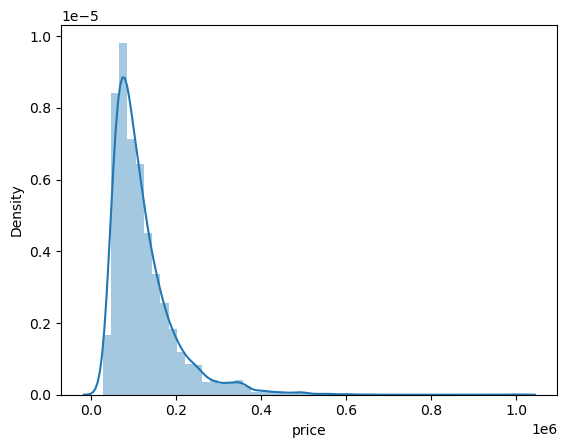

In [16]:
sns.distplot(data_copy['price'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\3778045335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy_1['price'])


<Axes: xlabel='price', ylabel='Density'>

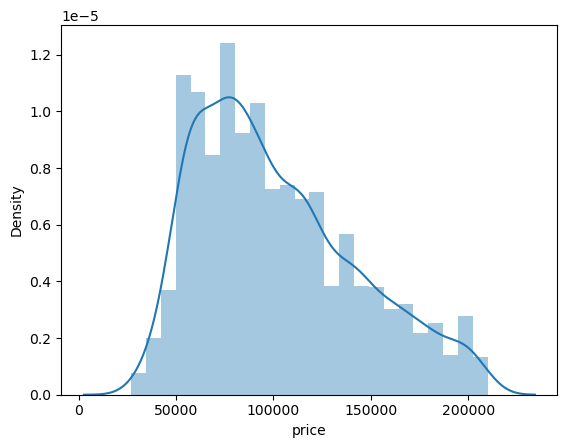

In [17]:
q = data_copy['price'].quantile(0.9)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_copy_1 = data_copy[data_copy['price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_copy_1.describe(include='all')
sns.distplot(data_copy_1['price'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\4041512978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['gross_area'])


<Axes: xlabel='gross_area', ylabel='Density'>

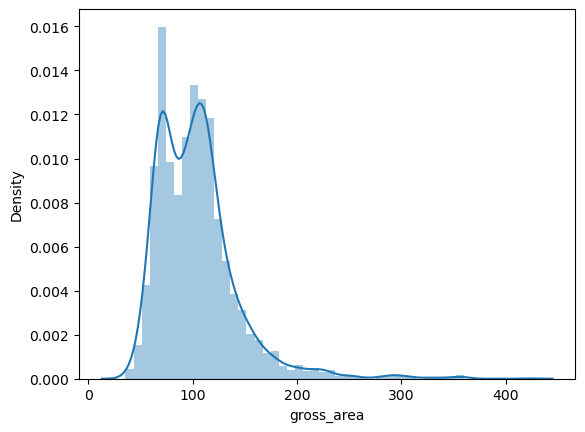

In [18]:
sns.distplot(data_copy['gross_area'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\2914980403.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy_1['gross_area'])


<Axes: xlabel='gross_area', ylabel='Density'>

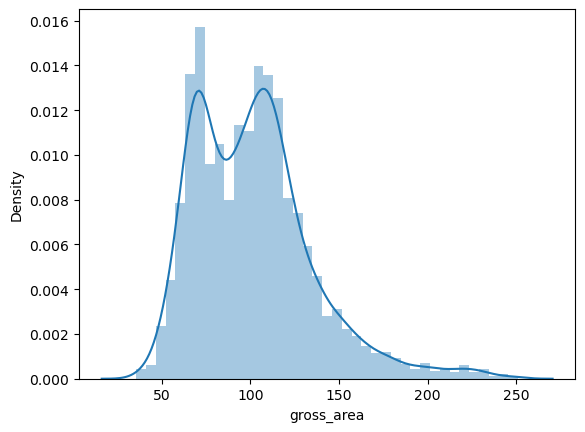

In [19]:
q = data_copy['gross_area'].quantile(0.99)
#  We can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_copy_1 = data_copy[data_copy['gross_area']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_copy_1.describe(include='all')
sns.distplot(data_copy_1['gross_area'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\980175060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['year'])


<Axes: xlabel='year', ylabel='Density'>

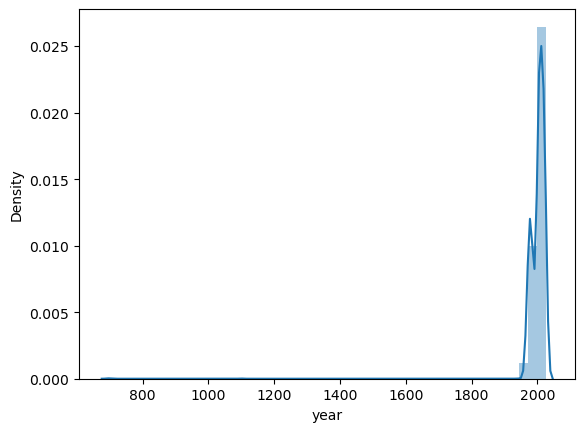

In [20]:
sns.distplot(data_copy['year'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\3621435015.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy_2['year'])


<Axes: xlabel='year', ylabel='Density'>

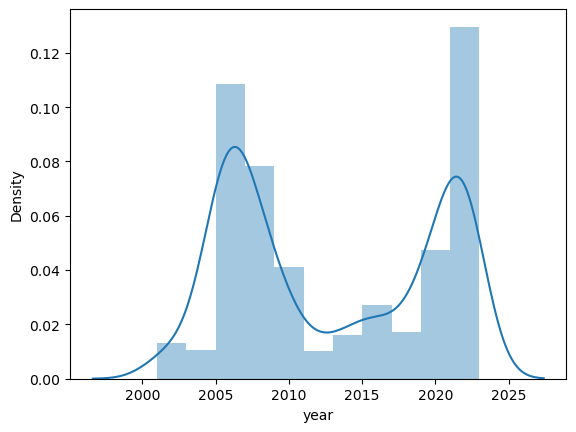

In [21]:
data_copy_2 = data_copy_1[(data_copy_1['year'] > 2000) & (data_copy_1['year'] < 2024)]
sns.distplot(data_copy_2['year'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\570489018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['floor'])


<Axes: xlabel='floor', ylabel='Density'>

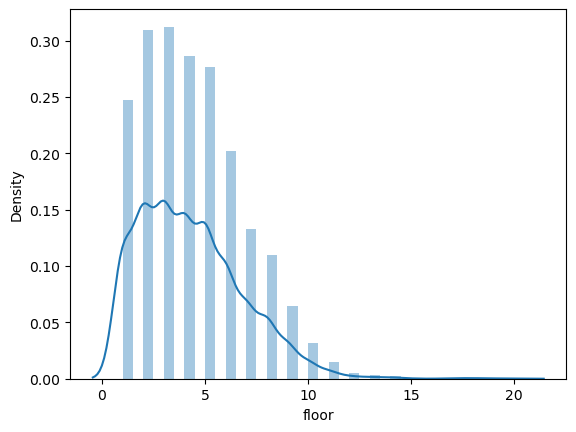

In [22]:
sns.distplot(data_copy['floor'])

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\1451793750.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy_2['distance_from_center'])


<Axes: xlabel='distance_from_center', ylabel='Density'>

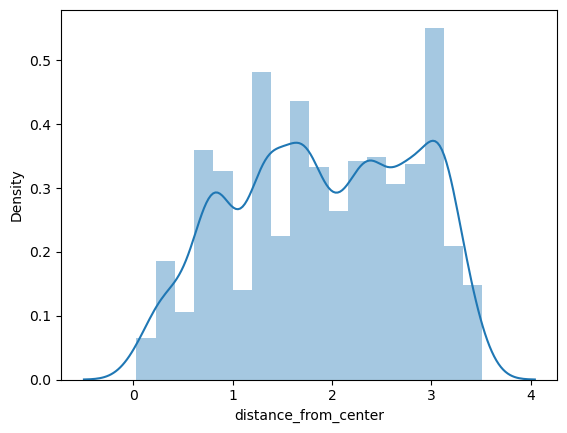

In [23]:
q = data_copy['distance_from_center'].quantile(0.9)
data_copy_2 = data_copy[data_copy['distance_from_center']<q]
data_copy_2.describe(include='all')
sns.distplot(data_copy_2['distance_from_center'])

In [24]:
data_cleaned = data_copy_2.reset_index(drop=True)
data_cleaned.describe(include='all')

gross_area         year        floor    bathrooms     bedrooms  \
count   3318.000000  3318.000000  3318.000000  3318.000000  3318.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     103.932502  2002.027426     4.345992     1.449367     1.903858   
std       39.738447    36.150635     2.539338     0.530355     0.721422   
min       37.000000   697.000000     1.000000     1.000000     1.000000   
25%       75.000000  1985.000000     2.000000     1.000000     1.000000   
50%      100.000000  2006.000000     4.000000     1.000000     2.000000   
75%      120.000000  2019.000000     6.000000     2.000000     2.000000   
max      422.000000  2025.000000    20.000000     4.000000     6.000000   

          furnished      balcony     mortgage       status  \
count   3318.000000  3318.000000  3318.000000         3318   
unique          NaN          NaN          NaN            4   
top             NaN          NaN          NaN  pallat I ri   
freq            NaN          NaN          NaN         1653   
mean       0.256480     0.684448     0.541893          NaN   
std        0.436756     0.464805     0.498317          NaN   
min        0.000000     0.000000     0.000000          NaN   
25%        0.000000     0.000000     0.000000          NaN   
50%        0.000000     1.000000     1.000000          NaN   
75%        1.000000     1.000000     1.000000          NaN   
max        1.000000     1.000000     1.000000          NaN   

                            address orientation  air_conditioner  solar_panel  \
count                          3318        3318      3318.000000  3318.000000   
unique                          930          10              NaN          NaN   
top     astir tirane,Tirana,Albania   juglindje              NaN          NaN   
freq                            337         824              NaN          NaN   
mean                            NaN         NaN         0.076552     0.006028   
std                             NaN         NaN         0.265920     0.077416   
min                             NaN         NaN         0.000000     0.000000   
25%                             NaN         NaN         0.000000     0.000000   
50%                             NaN         NaN         0.000000     0.000000   
75%                             NaN         NaN         0.000000     0.000000   
max                             NaN         NaN         1.000000     1.000000   

                 price  latitude_center  longitude_center  \
count      3318.000000     3.318000e+03      3.318000e+03   
unique             NaN              NaN               NaN   
top                NaN              NaN               NaN   
freq               NaN              NaN               NaN   
mean     126494.995298     4.132795e+01      1.981903e+01   
std       76567.569930     1.421300e-14      1.211658e-12   
min       29100.000000     4.132795e+01      1.981902e+01   
25%       75920.000000     4.132795e+01      1.981902e+01   
50%      106000.000000     4.132795e+01      1.981902e+01   
75%      150000.000000     4.132795e+01      1.981902e+01   
max     1000000.000000     4.132795e+01      1.981902e+01   

        distance_from_center     Ashensor       Parkim  
count            3318.000000  3318.000000  3318.000000  
unique                   NaN          NaN          NaN  
top                      NaN          NaN          NaN  
freq                     NaN          NaN          NaN  
mean                1.916340     0.356239     0.163653  
std                 0.891466     0.478959     0.370016  
min                 0.029958     0.000000     0.000000  
25%                 1.258228     0.000000     0.000000  
50%                 1.860079     0.000000     0.000000  
75%                 2.734960     1.000000     0.000000  
max                 3.512166  

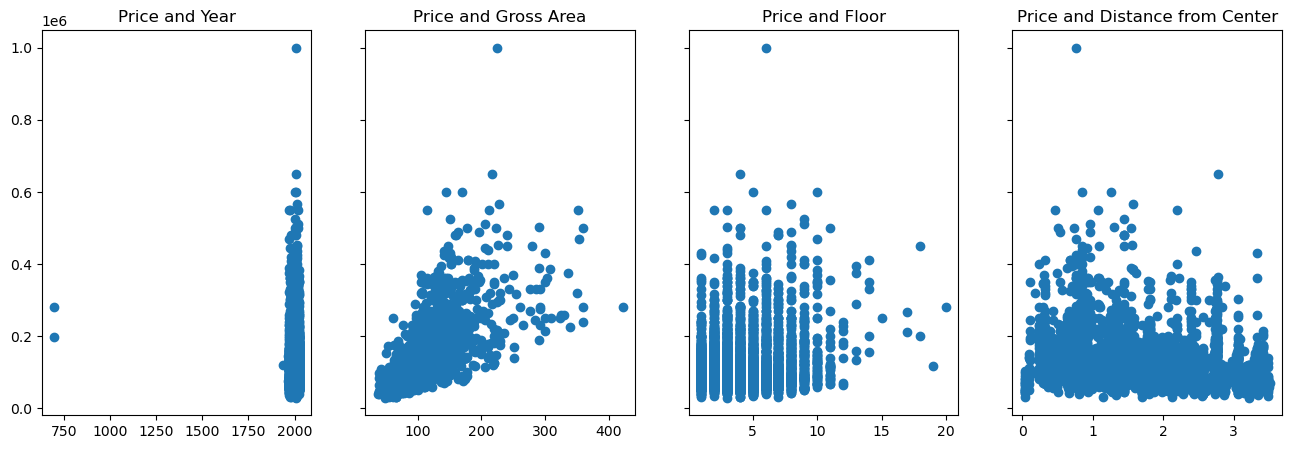

In [25]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(16,5),alpha=0.1) #sharey -> share 'Price' as y

ax1.scatter(data_cleaned['year'],data_cleaned['price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['gross_area'],data_cleaned['price'])
ax2.set_title('Price and Gross Area')
ax3.scatter(data_cleaned['floor'],data_cleaned['price'])
ax3.set_title('Price and Floor')
ax4.scatter(data_cleaned['distance_from_center'],data_cleaned['price'])
ax4.set_title('Price and Distance from Center')
plt.show()

In [27]:
data_cleaned.dtypes

gross_area              float64
year                    float64
floor                     int64
bathrooms                 int64
bedrooms                  int64
furnished                 int64
balcony                   int64
mortgage                  int64
status                   object
address                  object
orientation              object
air_conditioner           int64
solar_panel               int64
price                   float64
latitude_center         float64
longitude_center        float64
distance_from_center    float64
Ashensor                  int64
Parkim                    int64
dtype: object

In [29]:
object_dtypes = data_cleaned.select_dtypes(include=['object'])

for col in object_dtypes.columns:
    print(col)
    print(object_dtypes[col].unique())

status
['pallat I vjeter' 'pallat I ri' 'I PaPerfunduar' 'i rikonstruktuar']
address
['Sheshi Willson - Rruga "Zef Jubani" - Tirana e Re - Sheshi Willson, Shqipëri'
 'Myslym Shyri - Myslym Shyri - Myslym Shyri, Shqipëri'
 'Liqeni i Thate - Liqeni i Thatë, Shqipëri'
 'Rruga e Dafinave - Fusha e Aviacionit, Shqipëri'
 'Rruga Bajram Curri - Tregu i Madh - Rruga 5 Maji, Shqipëri'
 'Rruga e Kavajes - Rruga e Kavajës, Shqipëri'
 'Rruga e Durrësit - Rruga Durresit - Qendër - Kafe Flora, Shqipëri'
 'Irfan Tomini - Selitë - Pallati me Shigjeta, Shqipëri'
 'Kodra e Diellit - Kodra e Diellit, Shqipëri' 'Myslym Shyri, Shqipëri'
 'Kompleksi Delijorgji, Shqipëri'
 'Xhamlliku - Rruga \x93Telo Ndini\x94 - Xhamlliku, Shqipëri'
 'Marko Bocari - Tirana e Re - Marko Bocari, Shqipëri'
 'Rruga Hamdi Garunja - Liqeni i Thatë, Shqipëri'
 'Tirana e Re - Petronini, Shqipëri' 'Fusha e Aviacionit, Shqipëri'
 'Teodor Keko - Astir, Shqipëri' 'Liqeni i Thatë, Shqipëri'
 'Rruga Shefqet Musaraj - 21 Dhejtori - 21 Dhje

In [30]:
data_with_dummies = pd.get_dummies(data)
data_with_dummies

gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3835        93.0  1977.0      5          1         2          0        1   
3836       139.0  2007.0      3          2         2          1        1   
3837       135.0  1977.0      4          2         3          1        1   
3838        76.0  2006.0      7          1         1          0        1   
3839       124.0  2007.0      4          1         2          0        0   

      mortgage        lat        lon  ...  price_98800.0$  price_98960.0$  \
0            1  41.318484  19.814526  ...           False           False   
1            0  41.324711  19.812847  ...           False           False   
2            1  41.303166  19.815420  ...           False           False   
3            1  41.335320  19.787532  ...           False           False   
4            1  41.335320  19.787532  ...           False           False   
...        ...        ...        ...  ...             ...             ...   
3835         0  41.318484  19.814526  ...           False           False   
3836         1  41.318335  19.823212  ...           False           False   
3837         1  41.331172  19.780903  ...           False           False   
3838         0  41.337938  19.785530  ...           False           False   
3839         0  41.303166  19.815420  ...           False           False   

      price_99000.0$  price_99300.0$  price_99365.0$  price_99500.0$  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False           False           False   
...              ...             ...             ...             ...   
3835           False           False           False           False   
3836           False           False           False           False   
3837           False           False           False           False   
3838           False           False           False           False   
3839           False           False           False           False   

      price_99590.0$  price_99800.0$  price_99900.0$  price_99920.0$  
0              False           False           False           False  
1              False           False           False           False  
2              False           False           False           False  
3              False           False           False           False  
4              False           False           False           False  
...              ...             ...             ...             ...  
3835           False           False           False           False  
3836           False           False           False           False  
3837           False           False           False           False  
3838           False           False           False           False  
3839           False           False           False           False  

[3840 rows x 5642 columns]

In [31]:
data_cleaned = data_cleaned.drop(columns=['address','orientation'])
data_cleaned.dtypes

gross_area              float64
year                    float64
floor                     int64
bathrooms                 int64
bedrooms                  int64
furnished                 int64
balcony                   int64
mortgage                  int64
status                   object
air_conditioner           int64
solar_panel               int64
price                   float64
latitude_center         float64
longitude_center        float64
distance_from_center    float64
Ashensor                  int64
Parkim                    int64
dtype: object

In [32]:
data_with_dummies = pd.get_dummies(data_cleaned)
data_with_dummies

gross_area    year  floor  bathrooms  bedrooms  furnished  balcony  \
0          110.0  1998.0      1          1         2          1        1   
1          160.0  2000.0      1          2         3          0        0   
2          126.5  2021.0      2          1         2          1        1   
3          130.5  2021.0      2          2         2          0        1   
4          131.7  2021.0      2          2         2          0        1   
...          ...     ...    ...        ...       ...        ...      ...   
3313        93.0  1977.0      5          1         2          0        1   
3314       139.0  2007.0      3          2         2          1        1   
3315       135.0  1977.0      4          2         3          1        1   
3316        76.0  2006.0      7          1         1          0        1   
3317       124.0  2007.0      4          1         2          0        0   

      mortgage  air_conditioner  solar_panel     price  latitude_center  \
0            1                0            0  170000.0        41.327953   
1            0                0            0  224000.0        41.327953   
2            1                1            0  195000.0        41.327953   
3            1                0            0  156000.0        41.327953   
4            1                0            0  159000.0        41.327953   
...        ...              ...          ...       ...              ...   
3313         0                0            0  135000.0        41.327953   
3314         1                0            0  238000.0        41.327953   
3315         1                0            0  120000.0        41.327953   
3316         0                0            0   68400.0        41.327953   
3317         0                0            0  167000.0        41.327953   

      longitude_center  distance_from_center  Ashensor  Parkim  \
0            19.819025              1.117104         0       0   
1            19.819025              0.630246         0       0   
2            19.819025              2.769368         1       1   
3            19.819025              2.760413         1       1   
4            19.819025              2.760413         1       1   
...                ...                   ...       ...     ...   
3313         19.819025              1.117104         0       0   
3314         19.819025              1.124268         0       0   
3315         19.819025              3.211295         0       0   
3316         19.819025              3.015192         0       0   
3317         19.819025              2.769368         0       1   

      status_I PaPerfunduar  status_i rikonstruktuar  status_pallat I ri  \
0                     False                    False               False   
1                     False                    False               False   
2                     False                    False                True   
3                      True                    False               False   
4                      True                    False               False   
...                     ...                      ...                 ...   
3313                  False                    False               False   
3314                  False                    False                True   
3315                  False                    False               False   
3316                  False                    False                True   
3317                  False                    False                True   

      status_pallat I vjeter  
0                       True  
1                       True  
2                      False  
3                      False  
4                      False  
...                      ...  
3313                    True  
3314                   False  
3315                    True  
3316                   False  
3317                   False  

[3318 rows x 20 columns]

In [33]:
data_with_dummies.columns.values

array(['gross_area', 'year', 'floor', 'bathrooms', 'bedrooms',
       'furnished', 'balcony', 'mortgage', 'air_conditioner',
       'solar_panel', 'price', 'latitude_center', 'longitude_center',
       'distance_from_center', 'Ashensor', 'Parkim',
       'status_I PaPerfunduar', 'status_i rikonstruktuar',
       'status_pallat I ri', 'status_pallat I vjeter'], dtype=object)

In [34]:
targets = data_with_dummies['price']

inputs = data_with_dummies.drop(['price'],axis=1)

In [35]:

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)
print(f"x train is: {x_train}")
print(f"x test is: {x_test}")

print(f"Y train is: {y_train}")

print(f"y_test is : {y_test}")

x train is: [[ 0.4295606   0.13757223  2.22690359 ... -0.23738467  1.0036232
  -0.60543938]
 [ 0.10237218  0.58023144 -0.9239988  ... -0.23738467 -0.99638988
  -0.60543938]
 [ 1.41112583  0.13757223 -1.3178616  ... -0.23738467  1.0036232
  -0.60543938]
 ...
 [-0.04863785 -0.8030786  -0.13627321 ... -0.23738467 -0.99638988
   1.65169304]
 [-0.87919305 -0.49875039 -1.3178616  ... -0.23738467 -0.99638988
   1.65169304]
 [ 1.41112583  0.10990603  0.65145239 ... -0.23738467  1.0036232
  -0.60543938]]
x test is: [[ 1.41112583  0.10990603  2.62076639 ... -0.23738467  1.0036232
  -0.60543938]
 [-0.82885638  0.58023144  0.25758959 ... -0.23738467 -0.99638988
  -0.60543938]
 [ 0.40439226  0.16523843 -0.13627321 ... -0.23738467  1.0036232
  -0.60543938]
 ...
 [-0.04863785  0.16523843  1.04531519 ... -0.23738467  1.0036232
  -0.60543938]
 [-1.07022075  0.41423424  0.65145239 ... -0.23738467  1.0036232
  -0.60543938]
 [ 0.19801187  0.52489904  0.65145239 ... -0.23738467  1.0036232
  -0.60543938]]
Y

In [37]:

model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
train_score=model.score(x_train,y_train)#R2
train_score

0.99998990167081

In [39]:
y_hat = model.predict(x_train)

len(y_hat)
len(y_train)

2654

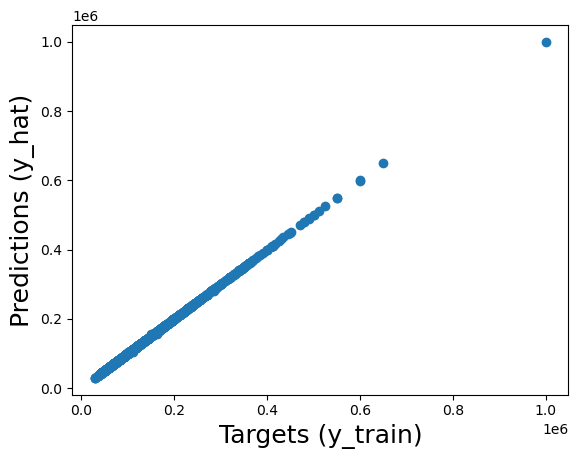

In [40]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [41]:
y_train - y_hat

3003    0.0
169     0.0
1527    0.0
2108    0.0
2093    0.0
       ... 
2309    0.0
428     0.0
859     0.0
801     0.0
2740    0.0
Name: price, Length: 2654, dtype: float64

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\329104437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

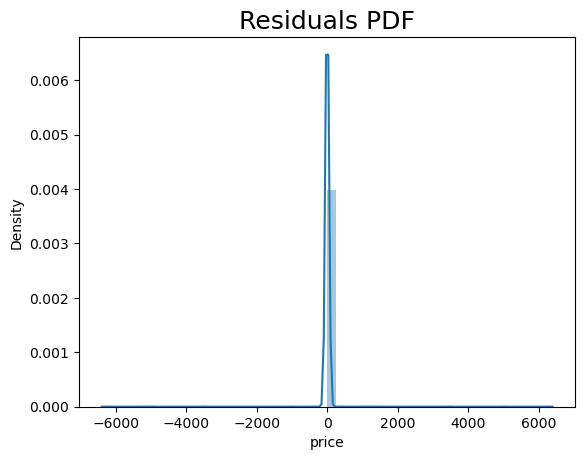

In [42]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [43]:
model.score(x_train,y_train)

0.99998990167081

In [45]:
y_hat_test = model.predict(x_test)
y_test-y_hat_test

3254   -85000.0
1498   -23110.0
84      40000.0
2638    -2300.0
1609   -12000.0
         ...   
1862        0.0
561    -11142.0
2718    38000.0
101     18005.0
59     -23000.0
Name: price, Length: 664, dtype: float64

In [48]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(x_train, y_train)
test_score = best_model.score(x_test, y_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Testing Set R2 Score: {test_score}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Testing Set R2 Score: 0.5883599878658368


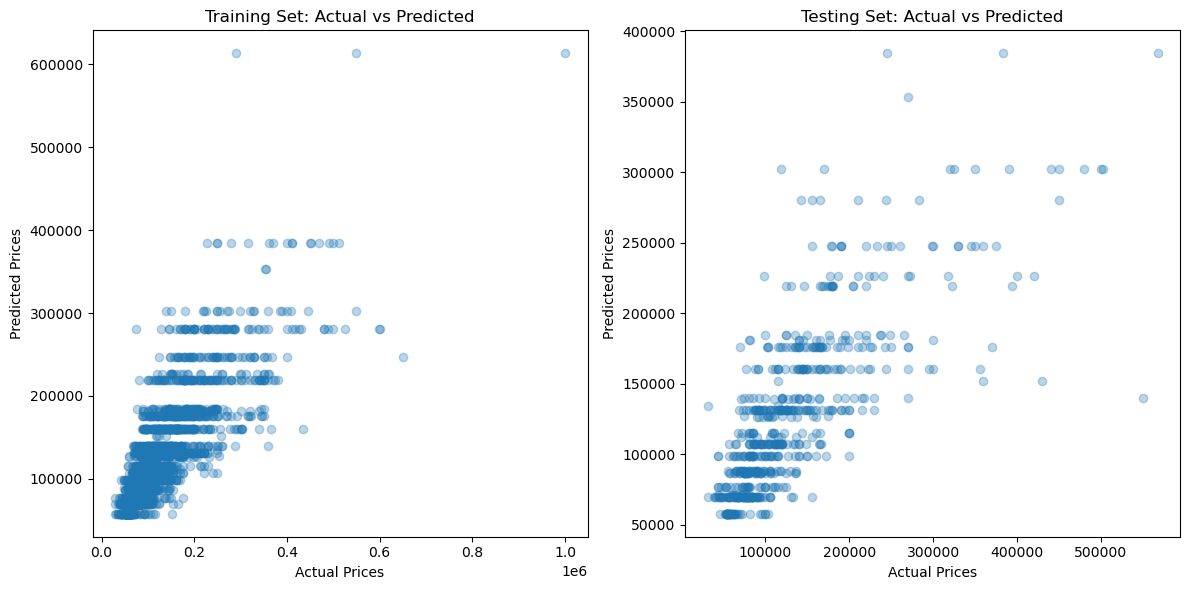

In [53]:
y_train_pred = best_model.predict(x_train)

# Predictions on the testing set
y_test_pred = best_model.predict(x_test)

# Scatter plot for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Scatter plot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()

C:\Users\esma\AppData\Local\Temp\ipykernel_14436\1761373523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred)


<Axes: xlabel='price', ylabel='Density'>

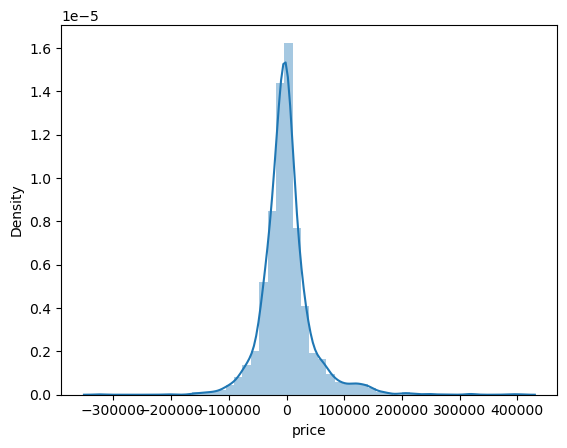

In [50]:
sns.distplot(y_train - y_train_pred)

In [51]:
y_train - y_train_pred

3003    65312.063492
169     -1694.278027
1527    18593.666667
2108    39907.954545
2093    44304.396226
            ...     
2309   -42515.334821
428       575.068902
859    -13378.695652
801     26504.396226
2740     7657.656250
Name: price, Length: 2654, dtype: float64

In [52]:
r2_train = r2_score(y_train, y_train_pred)
# R2 score for the testing set
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 Score on Training Set: {r2_train}")
print(f"R2 Score on Testing Set: {r2_test}")

R2 Score on Training Set: 0.6537929929277584
R2 Score on Testing Set: 0.5883599878658368
